# 1.Business/Real-world Problem

## 1.1 Problem Statement 

### Mercedes-Benz Greener Manufacturing- Can you cut the time a Mercedes-Benz spends on the test bench?

1. Since the first automobile, the Benz Patent Motor Car, was introduced
in 1886, Mercedes-Benz has been consistent with significant
automotive advancements. The passenger safety cell with crumple
zone, the airbag, and intelligent assistance systems are examples of
these advancements. Mercedes-Benz files almost 2000 patent
applications per year, making it the European premium vehicle leader.
Mercedes-Benz automobiles are market leaders in the premium
automotive segment. Customers can get customized Mercedes-Benz of
their dreams with a wide range of features and options.
2. Daimler engineers have devised a sophisticated testing method to
verify the safety and reliability of each and every unique car
configuration before it hits the road. However, without a powerful
algorithmic method, optimizing the performance of their testing system
for so many different feature combinations is hard and timeconsuming. Daimler's production lines prioritize safety and efficiency
as one of the world's largest premium automobile manufacturers.
3. Daimler seeks to combat the curse of dimensionality and cut the
amount of time that automobiles spend on the test bench. Time delays
occur as a result of a lack of coordination among manufacturing sub
processes. Mercedes testing process must be extremely wellcontrolled, with only a few focalized perturbations.
4. Hence, objective of this case study is to accurately predict the testing
time using Machine learning models. This will help in optimizing testing
time; resulting into lower carbon emissions during testing.

## 1.2 Real-world/Business objectives and constraints.

There are no strict latency constraints. But model shall predict the time required for testing in few seconds to few minutes, not in hours.

# 2. Machine Learning problem

## 2.1 Data

This dataset contains an anonymized set of variables, each representing a custom feature in a Mercedes car. For example, a variable could be 4WD, added air suspension, or a head-up display.

The ground truth is labeled ‘y’ and represents the time (in seconds) that the car took to pass testing for each variable.

File descriptions

Variables with letters are categorical. Variables with 0/1 are binary values.

train.csv - the training set
test.csv - the test set, you must predict the 'y' variable for the 'ID's in this file

Link to the data set: https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/data

## 2.2. Mapping the real-world problem to an ML problem

### 2.2.1. Type of Machine Learning Problem

Since we need to predict the time required for testing of the vehicle which is a continueous variable, this problem comes under the category of regression problem in machine learning. 

### 2.2.2. Performance Metric

Since we need to predict the time required for testing of the vehicle
which is a continuous variable, this problem comes under the category
of regression problem in machine learning. Since this is a regression
problem we will use R^2 as a model evaluation metrics.

https://www.geeksforgeeks.org/ml-r-squared-in-regression-analysis/

# 3. Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings("ignore")

In [2]:
training_data = pd.read_csv("train.csv")
testing_data = pd.read_csv("test.csv")

In [3]:
testing_data.head()

ID  X0 X1  X2 X3 X4 X5 X6 X8  X10  ...  X375  X376  X377  X378  X379  X380  \
0   1  az  v   n  f  d  t  a  w    0  ...     0     0     0     1     0     0   
1   2   t  b  ai  a  d  b  g  y    0  ...     0     0     1     0     0     0   
2   3  az  v  as  f  d  a  j  j    0  ...     0     0     0     1     0     0   
3   4  az  l   n  f  d  z  l  n    0  ...     0     0     0     1     0     0   
4   5   w  s  as  c  d  y  i  m    0  ...     1     0     0     0     0     0   

   X382  X383  X384  X385  
0     0     0     0     0  
1     0     0     0     0  
2     0     0     0     0  
3     0     0     0     0  
4     0     0     0     0  

[5 rows x 377 columns]

In [4]:
ID = testing_data["ID"]

In [5]:
training_data.head()

ID       y  X0 X1  X2 X3 X4 X5 X6 X8  ...  X375  X376  X377  X378  X379  \
0   0  130.81   k  v  at  a  d  u  j  o  ...     0     0     1     0     0   
1   6   88.53   k  t  av  e  d  y  l  o  ...     1     0     0     0     0   
2   7   76.26  az  w   n  c  d  x  j  x  ...     0     0     0     0     0   
3   9   80.62  az  t   n  f  d  x  l  e  ...     0     0     0     0     0   
4  13   78.02  az  v   n  f  d  h  d  n  ...     0     0     0     0     0   

   X380  X382  X383  X384  X385  
0     0     0     0     0     0  
1     0     0     0     0     0  
2     0     1     0     0     0  
3     0     0     0     0     0  
4     0     0     0     0     0  

[5 rows x 378 columns]

In [6]:
training_data.tail()

ID       y  X0 X1  X2 X3 X4  X5 X6 X8  ...  X375  X376  X377  X378  \
4204  8405  107.39  ak  s  as  c  d  aa  d  q  ...     1     0     0     0   
4205  8406  108.77   j  o   t  d  d  aa  h  h  ...     0     1     0     0   
4206  8412  109.22  ak  v   r  a  d  aa  g  e  ...     0     0     1     0   
4207  8415   87.48  al  r   e  f  d  aa  l  u  ...     0     0     0     0   
4208  8417  110.85   z  r  ae  c  d  aa  g  w  ...     1     0     0     0   

      X379  X380  X382  X383  X384  X385  
4204     0     0     0     0     0     0  
4205     0     0     0     0     0     0  
4206     0     0     0     0     0     0  
4207     0     0     0     0     0     0  
4208     0     0     0     0     0     0  

[5 rows x 378 columns]

In [7]:
print('Training_data shape= ', training_data.shape)
print('Testing_data shape= ', testing_data.shape)

Training_data shape=  (4209, 378)
Testing_data shape=  (4209, 377)


In [8]:
print('Number of rows in training data= ',training_data.shape[0])
print('Number of features in training data= ',training_data.shape[1])

Number of rows in training data=  4209
Number of features in training data=  378


In [9]:
# Calulating all Categorical features

Categorical_features=[]

for each in training_data.columns:
    if training_data[each].dtype == 'O': #object
        Categorical_features.append(each)
        
Categorical_features
print(len(Categorical_features))

8


In [10]:
# Calulating all Numerical features

Numerical_features=[]

for each in training_data.columns:
    if training_data[each].dtype != 'O': #object
        Numerical_features.append(each)
        
Numerical_features
print(len(Numerical_features))

370


There are 378 features in training dataset. Out of total 378 features, 370 features are numerical and remaining 8 features are categorical in nature

In [11]:
training_data.describe()

ID            y          X10     X11          X12  \
count  4209.000000  4209.000000  4209.000000  4209.0  4209.000000   
mean   4205.960798   100.669318     0.013305     0.0     0.075077   
std    2437.608688    12.679381     0.114590     0.0     0.263547   
min       0.000000    72.110000     0.000000     0.0     0.000000   
25%    2095.000000    90.820000     0.000000     0.0     0.000000   
50%    4220.000000    99.150000     0.000000     0.0     0.000000   
75%    6314.000000   109.010000     0.000000     0.0     0.000000   
max    8417.000000   265.320000     1.000000     0.0     1.000000   

               X13          X14          X15          X16          X17  ...  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000  ...   
mean      0.057971     0.428130     0.000475     0.002613     0.007603  ...   
std       0.233716     0.494867     0.021796     0.051061     0.086872  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%       0.000000     1.000000     0.000000     0.000000     0.000000  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

              X375         X376         X377         X378         X379  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000   
mean      0.318841     0.057258     0.314802     0.020670     0.009503   
std       0.466082     0.232363     0.464492     0.142294     0.097033   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     0.000000     1.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

              X380         X382         X383         X384         X385  
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000  
mean      0.008078     0.007603     0.001663     0.000475     0.001426  
std       0.089524     0.086872     0.040752     0.021796     0.037734  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 370 columns]

In [12]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


#### Checking Null values

In [13]:
training_data.isnull().sum()

ID      0
y       0
X0      0
X1      0
X2      0
X3      0
X4      0
X5      0
X6      0
X8      0
X10     0
X11     0
X12     0
X13     0
X14     0
X15     0
X16     0
X17     0
X18     0
X19     0
X20     0
X21     0
X22     0
X23     0
X24     0
X26     0
X27     0
X28     0
X29     0
X30     0
       ..
X355    0
X356    0
X357    0
X358    0
X359    0
X360    0
X361    0
X362    0
X363    0
X364    0
X365    0
X366    0
X367    0
X368    0
X369    0
X370    0
X371    0
X372    0
X373    0
X374    0
X375    0
X376    0
X377    0
X378    0
X379    0
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64

There are no null values

In [14]:
training_data.duplicated().sum()

0

There are no duplicate rows in training data

### Analysing Categorical Features

In [15]:
Categorical_features

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

#### Checking value_counts for each categorical feature

In [16]:
for feature in Categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(training_data[feature].unique())))

The feature is X0 and number of categories are 47
The feature is X1 and number of categories are 27
The feature is X2 and number of categories are 44
The feature is X3 and number of categories are 7
The feature is X4 and number of categories are 4
The feature is X5 and number of categories are 29
The feature is X6 and number of categories are 12
The feature is X8 and number of categories are 25


### Checking box-plots

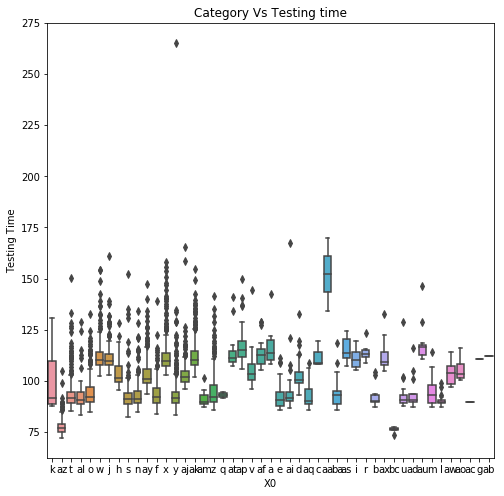

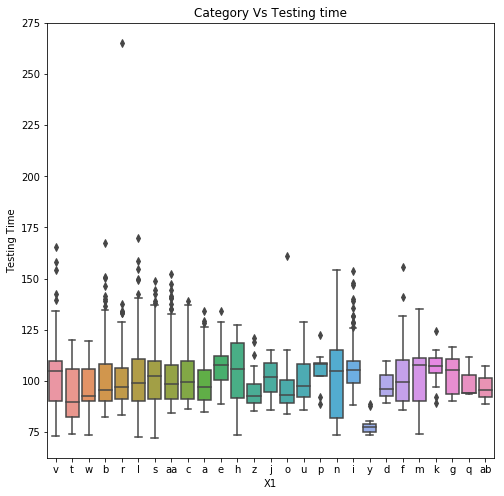

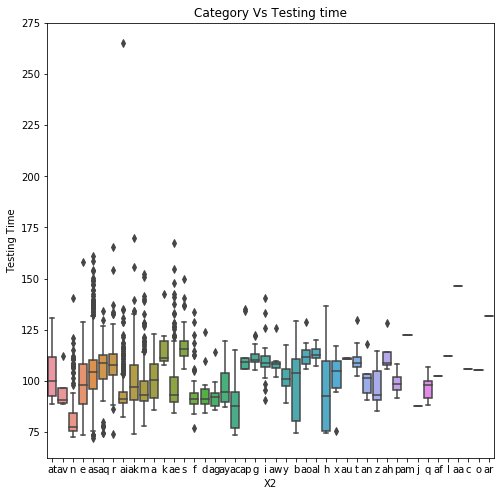

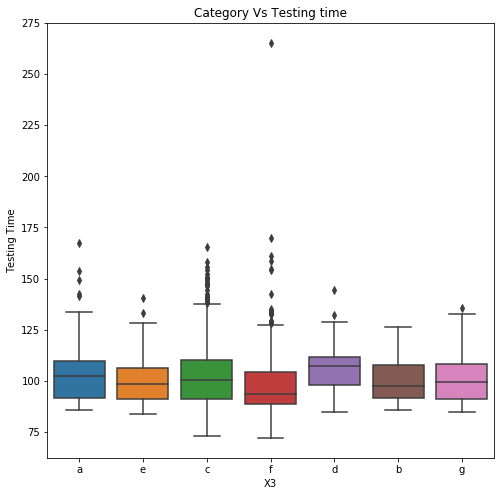

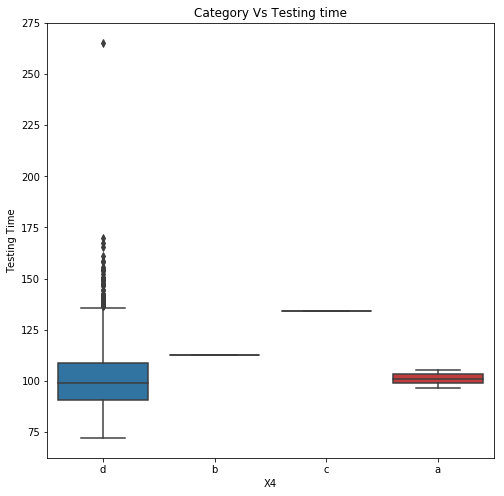

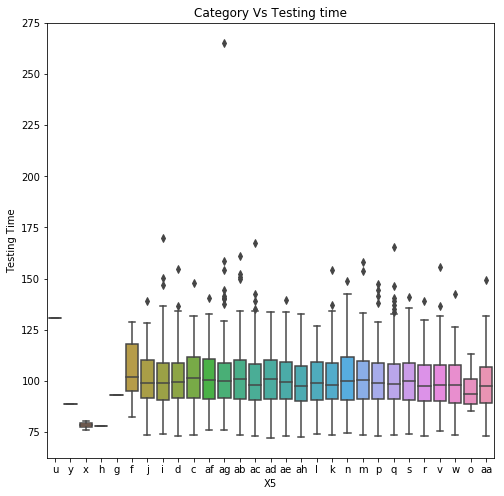

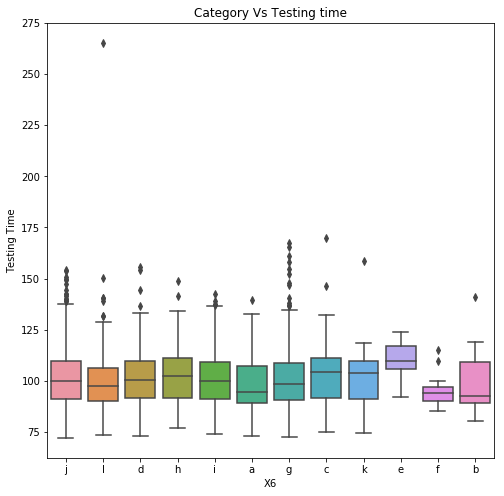

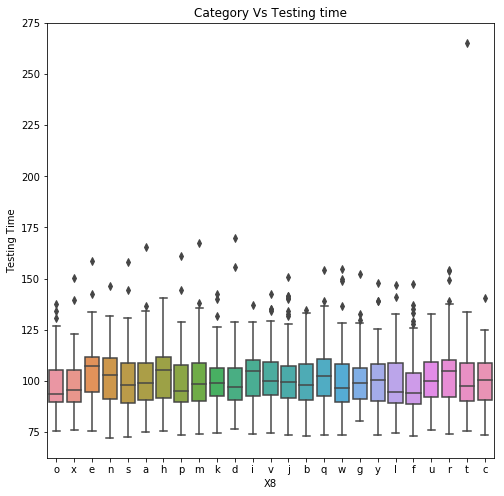

In [17]:
for each in Categorical_features:
    plt.figure(figsize=(8,8))
    sns.boxplot(training_data[each], training_data['y'])
    plt.title("Category Vs Testing time")
    plt.xlabel(each)
    plt.ylabel("Testing Time")
    

Box plot shows that there are some outliers in data and X4 feature has very less variance

### Checking the  relationship between categorical variable and dependent feature y

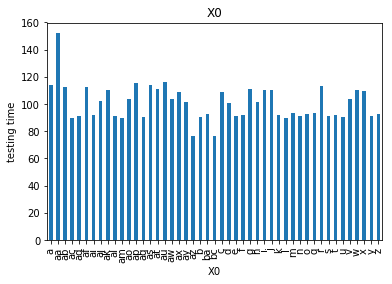

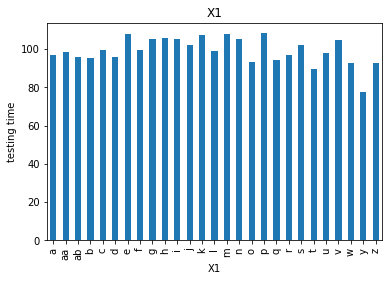

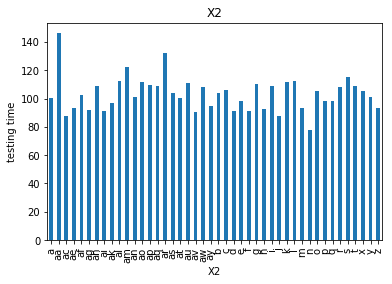

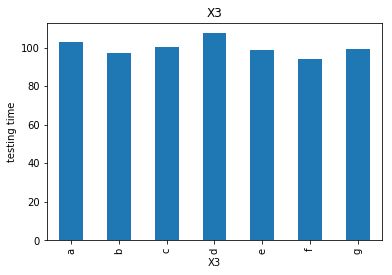

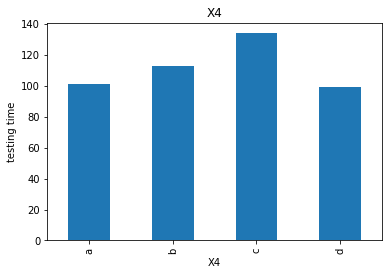

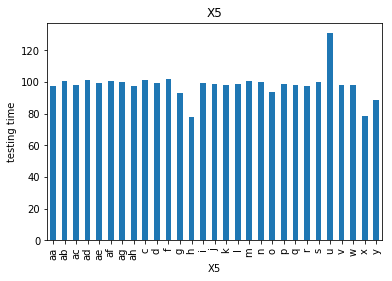

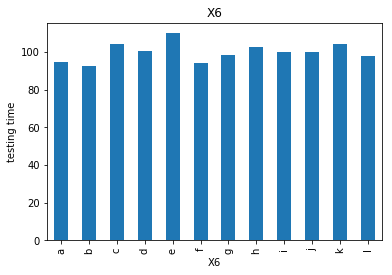

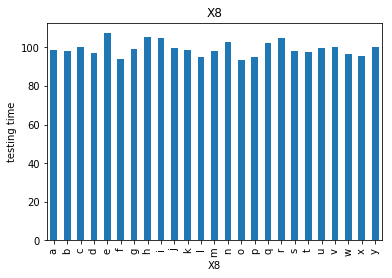

In [18]:
for feature in Categorical_features:
    data=training_data.copy()
    data.groupby(feature)['y'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('testing time')
    plt.title(feature)
    plt.show()

### Analysing Numerical features

In [19]:
Numerical_features

['ID',
 'y',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23',
 'X24',
 'X26',
 'X27',
 'X28',
 'X29',
 'X30',
 'X31',
 'X32',
 'X33',
 'X34',
 'X35',
 'X36',
 'X37',
 'X38',
 'X39',
 'X40',
 'X41',
 'X42',
 'X43',
 'X44',
 'X45',
 'X46',
 'X47',
 'X48',
 'X49',
 'X50',
 'X51',
 'X52',
 'X53',
 'X54',
 'X55',
 'X56',
 'X57',
 'X58',
 'X59',
 'X60',
 'X61',
 'X62',
 'X63',
 'X64',
 'X65',
 'X66',
 'X67',
 'X68',
 'X69',
 'X70',
 'X71',
 'X73',
 'X74',
 'X75',
 'X76',
 'X77',
 'X78',
 'X79',
 'X80',
 'X81',
 'X82',
 'X83',
 'X84',
 'X85',
 'X86',
 'X87',
 'X88',
 'X89',
 'X90',
 'X91',
 'X92',
 'X93',
 'X94',
 'X95',
 'X96',
 'X97',
 'X98',
 'X99',
 'X100',
 'X101',
 'X102',
 'X103',
 'X104',
 'X105',
 'X106',
 'X107',
 'X108',
 'X109',
 'X110',
 'X111',
 'X112',
 'X113',
 'X114',
 'X115',
 'X116',
 'X117',
 'X118',
 'X119',
 'X120',
 'X122',
 'X123',
 'X124',
 'X125',
 'X126',
 'X127',
 'X128',
 'X129',
 'X130',
 'X131',
 'X1

In [20]:
len(Numerical_features)

370

### Checking the distribution of Dependent variable

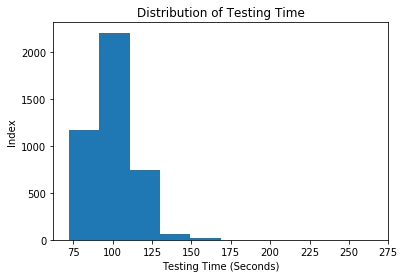

In [21]:
# lets plot histogram for dependent variable 'y'
plt.hist(training_data['y'])
plt.title("Distribution of Testing Time")
plt.xlabel("Testing Time (Seconds)")
plt.ylabel("Index")
plt.show()

Range of the testing time is between 75 seconds to 160 seconds. Mean testing time is near about 100-120 seconds.

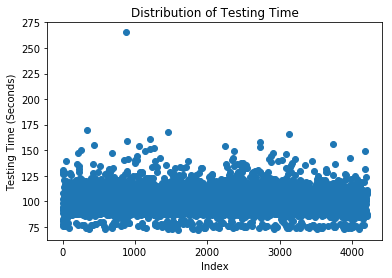

In [22]:
plt.scatter(range(len(training_data['y'])), training_data['y'])
plt.title("Distribution of Testing Time")
plt.xlabel("Index")
plt.ylabel("Testing Time (Seconds)")
plt.show()

There are outliers in training_data

In [23]:
# lets find out the 90th to 100th percentiles 
quantiles = [0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1] 
for i in quantiles: 
    print(f"{i*100}th percentile: ",training_data["y"].quantile(i))

90.0th percentile:  115.25
91.0th percentile:  116.0484
92.0th percentile:  116.89160000000001
93.0th percentile:  118.0376
94.0th percentile:  119.056
95.0th percentile:  120.80600000000001
96.0th percentile:  122.4
97.0th percentile:  125.89319999999998
98.0th percentile:  129.2992
99.0th percentile:  137.4304
100th percentile:  265.32


In [24]:
# lets find out the 99th to 99.99th percentiles 
quantiles = np.arange(0.99,0.9999,0.001)
for i in quantiles: 
    print(f"{i*100}th percentile: ",training_data["y"].quantile(i))

99.0th percentile:  137.4304
99.1th percentile:  139.09024
99.2th percentile:  140.1836
99.3th percentile:  140.81639999999993
99.4th percentile:  142.6480000000001
99.5th percentile:  146.23040000000006
99.6th percentile:  149.0374399999998
99.7th percentile:  151.4276800000003
99.8th percentile:  154.68695999999994
99.9th percentile:  160.38328000000087


Let's use 160.38 as threshold time and consider values all above 160.38 as outliers

In [25]:
# I will keep only the configurations which have less than 160.38 seconds test time
clean_train = training_data[training_data['y']<160.38]
print(f"Train data with outlier:{training_data.shape}")
print(f"Train data without outlier:{clean_train.shape}")
clean_train.head()

Train data with outlier:(4209, 378)
Train data without outlier:(4204, 378)


ID       y  X0 X1  X2 X3 X4 X5 X6 X8  ...  X375  X376  X377  X378  X379  \
0   0  130.81   k  v  at  a  d  u  j  o  ...     0     0     1     0     0   
1   6   88.53   k  t  av  e  d  y  l  o  ...     1     0     0     0     0   
2   7   76.26  az  w   n  c  d  x  j  x  ...     0     0     0     0     0   
3   9   80.62  az  t   n  f  d  x  l  e  ...     0     0     0     0     0   
4  13   78.02  az  v   n  f  d  h  d  n  ...     0     0     0     0     0   

   X380  X382  X383  X384  X385  
0     0     0     0     0     0  
1     0     0     0     0     0  
2     0     1     0     0     0  
3     0     0     0     0     0  
4     0     0     0     0     0  

[5 rows x 378 columns]

#### Applying encoding on categorical features

In [26]:
clean_train_obj = clean_train.select_dtypes(include=[object])
clean_train_num = clean_train.drop(clean_train_obj, axis = 1)
clean_train_obj = pd.get_dummies(clean_train_obj)
clean_train = pd.concat([clean_train_obj,clean_train_num], axis = 1)

In [27]:
clean_train

X0_a  X0_aa  X0_ab  X0_ac  X0_ad  X0_af  X0_ai  X0_aj  X0_ak  X0_al  \
0        0      0      0      0      0      0      0      0      0      0   
1        0      0      0      0      0      0      0      0      0      0   
2        0      0      0      0      0      0      0      0      0      0   
3        0      0      0      0      0      0      0      0      0      0   
4        0      0      0      0      0      0      0      0      0      0   
5        0      0      0      0      0      0      0      0      0      0   
6        0      0      0      0      0      0      0      0      0      1   
7        0      0      0      0      0      0      0      0      0      0   
8        0      0      0      0      0      0      0      0      0      0   
9        0      0      0      0      0      0      0      0      0      0   
10       0      0      0      0      0      0      0      0      0      0   
11       0      0      0      0      0      0      0      0      0      1   
12       0      0      0      0      0      0      0      0      0      0   
13       0      0      0      0      0      0      0      0      0      1   
14       0      0      0      0      0      0      0      0      0      0   
15       0      0      0      0      0      0      0      0      0      0   
16       0      0      0      0      0      0      0      0      0      1   
17       0      0      0      0      0      0      0      0      0      0   
18       0      0      0      0      0      0      0      0      0      0   
19       0      0      0      0      0      0      0      0      0      0   
20       0      0      0      0      0      0      0      0      0      0   
21       0      0      0      0      0      0      0      0      0      0   
22       0      0      0      0      0      0      0      0      0      0   
23       0      0      0      0      0      0      0      0      0      0   
24       0      0      0      0      0      0      0      0      0      0   
25       0      0      0      0      0      0      0      0      0      0   
26       0      0      0      0      0      0      0      1      0      0   
27       0      0      0      0      0      0      0      0      0      0   
28       0      0      0      0      0      0      0      0      0      0   
29       0      0      0      0      0      0      0      0      0      0   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
4179     0      0      0      0      0      0      0      0      0      1   
4180     0      0      0      0      0      0      0      0      0      0   
4181     0      0      0      0      0      0      0      0      0      0   
4182     0      0      0      0      0      0      0      0      0      0   
4183     0      0      0      0      0      0      0      0      0      0   
4184     0      0      0      0      0      0      0      0      0      0   
4185     0      0      0      0      0      0      0      0      1      0   
4186     0      0      0      0      0      0      0      0      0      0   
4187     0      0      0      0      0      0      0      1      0      0   
4188     0      0      0      0      0      0      0      0      0      0   
4189     0      0      0      0      0      0      0      1      0      0   
4190     0      0      0      0      0      0      0      0      0      0   
4191     0      0      0      0      0      0      0      0      0      0   
4192     0      0      0      0      0      0      0      1      0      0   
4193     0      0      0      0      0      0      0      0      1      0   
4194     0      0      0      0      0      0      0      0      0      0   
4195     0      0      0      0      0      0      0      0      0      0   
4196     0      0      0      0      0      0      0      0      0      0   
4197     0      0      0      0      0      0      0      0      0      0   
4198     0      0      0      0      0      0      0      0      0      0   
41

In [28]:
X=clean_train.drop(labels=['ID','y'], axis=1)
y=clean_train['y']

In [29]:
X.head()

X0_a  X0_aa  X0_ab  X0_ac  X0_ad  X0_af  X0_ai  X0_aj  X0_ak  X0_al  ...  \
0     0      0      0      0      0      0      0      0      0      0  ...   
1     0      0      0      0      0      0      0      0      0      0  ...   
2     0      0      0      0      0      0      0      0      0      0  ...   
3     0      0      0      0      0      0      0      0      0      0  ...   
4     0      0      0      0      0      0      0      0      0      0  ...   

   X375  X376  X377  X378  X379  X380  X382  X383  X384  X385  
0     0     0     1     0     0     0     0     0     0     0  
1     1     0     0     0     0     0     0     0     0     0  
2     0     0     0     0     0     0     1     0     0     0  
3     0     0     0     0     0     0     0     0     0     0  
4     0     0     0     0     0     0     0     0     0     0  

[5 rows x 563 columns]

In [30]:
y.head()

0    130.81
1     88.53
2     76.26
3     80.62
4     78.02
Name: y, dtype: float64

In [31]:
X_train=X
y_train=y

### Feature Selection- Dropping constant features (Variance threshold=0)

In [32]:
from sklearn.feature_selection import VarianceThreshold

var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [33]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [34]:
### Finding non constant features
sum(var_thres.get_support())

550

In [35]:
# Lets Find non-constant features 
len(X_train.columns[var_thres.get_support()])

550

In [36]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print(len(constant_columns))

13


In [37]:
for column in constant_columns:
    print(column)

X11
X93
X107
X233
X235
X268
X289
X290
X293
X297
X330
X339
X347


Above features are having zero variance. We will drop these  features.

In [38]:
X_train.drop(constant_columns,axis=1, inplace=True)

### Removing these features from test dataset as well

In [39]:
X_train.shape

(4204, 550)

## Feature Selection- With Correlation

In [40]:
#https://stackoverflow.com/questions/29294983/how-to-calculate-correlation-between-all-columns-and-remove-highly-correlated-on

# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

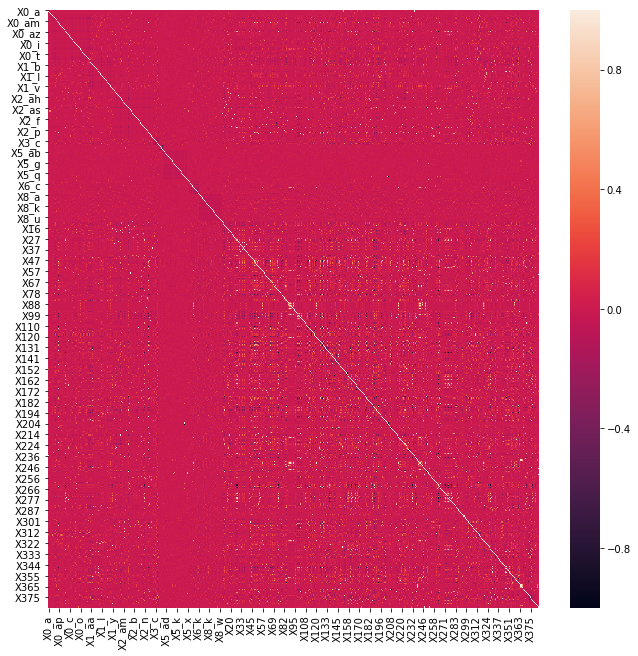

In [41]:
import seaborn as sns
#Using Pearson Correlation
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

In [42]:
corr_features = correlation(X_train, 0.9) # 90%  correlation
len(set(corr_features))

136

In [43]:
corr_features

{'X10',
 'X101',
 'X102',
 'X105',
 'X111',
 'X112',
 'X113',
 'X119',
 'X120',
 'X122',
 'X125',
 'X129',
 'X130',
 'X134',
 'X136',
 'X137',
 'X14',
 'X140',
 'X146',
 'X147',
 'X150',
 'X157',
 'X158',
 'X16',
 'X162',
 'X166',
 'X172',
 'X178',
 'X179',
 'X184',
 'X187',
 'X19',
 'X194',
 'X198',
 'X199',
 'X204',
 'X205',
 'X211',
 'X213',
 'X214',
 'X215',
 'X216',
 'X217',
 'X219',
 'X22',
 'X222',
 'X226',
 'X227',
 'X229',
 'X23',
 'X232',
 'X236',
 'X238',
 'X239',
 'X242',
 'X243',
 'X244',
 'X245',
 'X247',
 'X248',
 'X249',
 'X250',
 'X251',
 'X253',
 'X254',
 'X257',
 'X258',
 'X26',
 'X260',
 'X262',
 'X263',
 'X264',
 'X265',
 'X266',
 'X272',
 'X276',
 'X277',
 'X279',
 'X28',
 'X29',
 'X296',
 'X299',
 'X2_k',
 'X2_s',
 'X30',
 'X302',
 'X311',
 'X314',
 'X32',
 'X320',
 'X324',
 'X325',
 'X326',
 'X328',
 'X331',
 'X337',
 'X34',
 'X346',
 'X348',
 'X35',
 'X352',
 'X358',
 'X36',
 'X360',
 'X361',
 'X362',
 'X363',
 'X364',
 'X365',
 'X367',
 'X368',
 'X37',
 'X370'

#### Dropping corelated features from X_train and X_test

In [44]:
X_train.drop(corr_features,axis=1, inplace=True)

In [45]:
X_train.shape

(4204, 414)

## Feature Selection-Information gain - mutual information In Regression

#### Mutual Information

a. Mutual information is the term which is analogous to
information gain can be used to reduce number of
features in machine learning problem.

b. Mutual information (MI) between two random
variables is a non-negative number that indicates
how dependent the variables are on each other. It is
zero if and only if two random variables are
independent. If the MI score is 0 or extremely low,
such as 0.01 indicates that there is a poor link
between this feature and the target. Larger values
indicate greater dependence, indicating that feature
should be included in the training dataset.

c. Mutual Information measures the entropy drops
under the condition of the target value.

d. MI (feature;target) = Entropy(feature) -
Entropy(feature|target)

e. Using Scikit-learn top k percentile features can be
selected based on the mutual information between
target and that particular feature.



The mutual information between two random variables X and Y can be stated formally as follows:

#### I(X ; Y) = H(X) – H(X | Y) Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.

In [46]:
# https://machinelearningmastery.com/feature-selection-for-regression-data/
# https://towardsdatascience.com/select-features-for-machine-learning-model-with-mutual-information-534fe387d5c8


from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info

array([7.07586871e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.69351926e-04, 7.70870094e-03, 6.30031819e-03, 3.38252434e-02,
       8.21646648e-02, 7.29461607e-03, 3.35206846e-03, 0.00000000e+00,
       2.96228243e-02, 1.08492197e-03, 2.37824299e-03, 8.21545293e-03,
       3.85185855e-03, 2.74244916e-03, 3.14639179e-03, 6.07339363e-02,
       1.44628156e-01, 1.29006377e-03, 3.89010002e-03, 5.10145765e-03,
       0.00000000e+00, 1.49101112e-02, 2.07854867e-03, 2.00838581e-02,
       8.69283631e-05, 1.29999985e-02, 3.45742758e-03, 3.96573410e-02,
       0.00000000e+00, 4.67207046e-03, 3.88563912e-03, 2.14188826e-02,
       2.43234576e-02, 0.00000000e+00, 4.00397351e-03, 8.01330554e-03,
       4.29744641e-02, 1.94319916e-03, 5.06371462e-03, 3.54964042e-02,
       6.68968690e-02, 3.43140349e-02, 3.24033416e-02, 2.40628656e-03,
       1.25845719e-02, 0.00000000e+00, 6.76179603e-03, 0.00000000e+00,
       3.35700005e-04, 2.00884171e-03, 0.00000000e+00, 4.77534935e-04,
      

In [47]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

X127     0.407923
X261     0.346558
X313     0.158733
X0_az    0.144628
X189     0.128301
X118     0.125543
X275     0.110891
X234     0.106646
X316     0.096292
X115     0.088557
X0_ak    0.082165
X2_n     0.072897
X223     0.068642
X0_x     0.066897
X156     0.063583
X43      0.062759
X148     0.061868
X0_ay    0.060734
X185     0.053261
X350     0.051666
X114     0.049849
X286     0.048090
X191     0.047749
X256     0.047612
X171     0.046446
X2_as    0.046282
X3_f     0.045145
X218     0.043150
X2_ai    0.043025
X0_t     0.042974
           ...   
X6_i     0.000000
X6_g     0.000000
X2_av    0.000000
X2_au    0.000000
X2_at    0.000000
X6_d     0.000000
X6_c     0.000000
X8_x     0.000000
X1_s     0.000000
X8_y     0.000000
X5_l     0.000000
X2_j     0.000000
X91      0.000000
X1_ab    0.000000
X89      0.000000
X1_c     0.000000
X5_j     0.000000
X2_h     0.000000
X1_f     0.000000
X5_q     0.000000
X5_s     0.000000
X77      0.000000
X65      0.000000
X42      0.000000
X383     0

In [48]:
type(mutual_info)

pandas.core.series.Series

In [49]:
print (mutual_info.to_string())

X0_a     0.007076
X0_aa    0.000000
X0_ab    0.000000
X0_ac    0.000000
X0_ad    0.000869
X0_af    0.007709
X0_ai    0.006300
X0_aj    0.033825
X0_ak    0.082165
X0_al    0.007295
X0_am    0.003352
X0_ao    0.000000
X0_ap    0.029623
X0_aq    0.001085
X0_as    0.002378
X0_at    0.008215
X0_au    0.003852
X0_aw    0.002742
X0_ax    0.003146
X0_ay    0.060734
X0_az    0.144628
X0_b     0.001290
X0_ba    0.003890
X0_bc    0.005101
X0_c     0.000000
X0_d     0.014910
X0_e     0.002079
X0_f     0.020084
X0_g     0.000087
X0_h     0.013000
X0_i     0.003457
X0_j     0.039657
X0_k     0.000000
X0_l     0.004672
X0_m     0.003886
X0_n     0.021419
X0_o     0.024323
X0_q     0.000000
X0_r     0.004004
X0_s     0.008013
X0_t     0.042974
X0_u     0.001943
X0_v     0.005064
X0_w     0.035496
X0_x     0.066897
X0_y     0.034314
X0_z     0.032403
X1_a     0.002406
X1_aa    0.012585
X1_ab    0.000000
X1_b     0.006762
X1_c     0.000000
X1_d     0.000336
X1_e     0.002009
X1_f     0.000000
X1_g     0

In [50]:
from sklearn.feature_selection import SelectPercentile

In [51]:
## Selecting the top 10 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=10)
selected_top_columns.fit(X_train, y_train)

SelectPercentile(score_func=<function mutual_info_regression at 0x000001427579BD08>)

In [52]:
selected_top_columns.get_support()

array([False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,

In [53]:
X_train.columns[selected_top_columns.get_support()]

Index(['X0_aj', 'X0_ak', 'X0_ay', 'X0_az', 'X0_j', 'X0_t', 'X0_w', 'X0_x',
       'X2_ai', 'X2_as', 'X2_n', 'X3_f', 'X31', 'X43', 'X51', 'X80', 'X96',
       'X108', 'X114', 'X115', 'X118', 'X126', 'X127', 'X148', 'X156', 'X159',
       'X171', 'X185', 'X186', 'X189', 'X191', 'X218', 'X223', 'X234', 'X256',
       'X261', 'X275', 'X286', 'X313', 'X316', 'X334', 'X350'],
      dtype='object')

In [54]:
KKKK=X_train.columns[selected_top_columns.get_support()]
KKKK

Index(['X0_aj', 'X0_ak', 'X0_ay', 'X0_az', 'X0_j', 'X0_t', 'X0_w', 'X0_x',
       'X2_ai', 'X2_as', 'X2_n', 'X3_f', 'X31', 'X43', 'X51', 'X80', 'X96',
       'X108', 'X114', 'X115', 'X118', 'X126', 'X127', 'X148', 'X156', 'X159',
       'X171', 'X185', 'X186', 'X189', 'X191', 'X218', 'X223', 'X234', 'X256',
       'X261', 'X275', 'X286', 'X313', 'X316', 'X334', 'X350'],
      dtype='object')

In [55]:
df = pd.DataFrame([KKKK]).T
df

0
0   X0_aj
1   X0_ak
2   X0_ay
3   X0_az
4    X0_j
5    X0_t
6    X0_w
7    X0_x
8   X2_ai
9   X2_as
10   X2_n
11   X3_f
12    X31
13    X43
14    X51
15    X80
16    X96
17   X108
18   X114
19   X115
20   X118
21   X126
22   X127
23   X148
24   X156
25   X159
26   X171
27   X185
28   X186
29   X189
30   X191
31   X218
32   X223
33   X234
34   X256
35   X261
36   X275
37   X286
38   X313
39   X316
40   X334
41   X350

In [56]:
X_train=X_train[df[0].tolist()]

Selecting above features for X_train and X_test

In [57]:
X_train

X0_aj  X0_ak  X0_ay  X0_az  X0_j  X0_t  X0_w  X0_x  X2_ai  X2_as  ...  \
0         0      0      0      0     0     0     0     0      0      0  ...   
1         0      0      0      0     0     0     0     0      0      0  ...   
2         0      0      0      1     0     0     0     0      0      0  ...   
3         0      0      0      1     0     0     0     0      0      0  ...   
4         0      0      0      1     0     0     0     0      0      0  ...   
5         0      0      0      0     0     1     0     0      0      0  ...   
6         0      0      0      0     0     0     0     0      0      0  ...   
7         0      0      0      0     0     0     0     0      0      1  ...   
8         0      0      0      0     0     0     1     0      0      1  ...   
9         0      0      0      0     1     0     0     0      0      0  ...   
10        0      0      0      0     0     0     0     0      0      0  ...   
11        0      0      0      0     0     0     0     0      0      0  ...   
12        0      0      0      0     0     0     0     0      1      0  ...   
13        0      0      0      0     0     0     0     0      0      0  ...   
14        0      0      0      0     0     0     0     0      0      1  ...   
15        0      0      0      0     0     0     0     0      0      0  ...   
16        0      0      0      0     0     0     0     0      0      0  ...   
17        0      0      1      0     0     0     0     0      0      1  ...   
18        0      0      0      0     0     0     0     0      0      0  ...   
19        0      0      0      0     0     0     0     0      0      0  ...   
20        0      0      0      0     0     0     0     0      0      0  ...   
21        0      0      0      0     0     1     0     0      0      1  ...   
22        0      0      0      0     0     0     0     1      0      0  ...   
23        0      0      0      0     0     0     0     1      0      0  ...   
24        0      0      0      0     0     0     0     0      0      0  ...   
25        0      0      0      0     0     0     0     0      0      0  ...   
26        1      0      0      0     0     0     0     0      0      1  ...   
27        0      0      0      0     0     1     0     0      0      1  ...   
28        0      0      0      0     0     0     0     0      0      1  ...   
29        0      0      0      0     0     0     0     1      0      0  ...   
...     ...    ...    ...    ...   ...   ...   ...   ...    ...    ...  ...   
4179      0      0      0      0     0     0     0     0      0      0  ...   
4180      0      0      0      0     0     0     0     0      1      0  ...   
4181      0      0      0      0     0     0     0     0      0      1  ...   
4182      0      0      0      0     0     0     0     0      0      0  ...   
4183      0      0      0      0     0     0     0     0      0      0  ...   
4184      0      0      0      0     0     0     1     0      0      1  ...   
4185      0      1      0      0     0     0     0     0      0      0  ...   
4186      0      0      0      0     1     0     0     0      0      0  ...   
4187      1      0      0      0     0     0     0     0      0      0  ...   
4188      0      0      0      0     0     0     0     0      0      1  ...   
4189      1      0      0      0     0     0     0     0      0      1  ...   
4190      0      0      0      0     0     0     0     0      0      0  ...   
4191      0      0      0      0     0     0     0     0      0      0  ...   
4192      1      0      0      0     0     0     0     0      0      1  ...   
4193      0      1      0      0     0     0     0     0      0      0  ...   
4194      0      0      0      0     0     0     0     0      0      1  ...   
4195      0      0      0      0     0     0     0     0      0      0  ...   
4196      0      0      0      0     0     0     0     0      0      0  ...   
4197      0      0      0      0     0     0     0     0

In [58]:
testing_data.head()

ID  X0 X1  X2 X3 X4 X5 X6 X8  X10  ...  X375  X376  X377  X378  X379  X380  \
0   1  az  v   n  f  d  t  a  w    0  ...     0     0     0     1     0     0   
1   2   t  b  ai  a  d  b  g  y    0  ...     0     0     1     0     0     0   
2   3  az  v  as  f  d  a  j  j    0  ...     0     0     0     1     0     0   
3   4  az  l   n  f  d  z  l  n    0  ...     0     0     0     1     0     0   
4   5   w  s  as  c  d  y  i  m    0  ...     1     0     0     0     0     0   

   X382  X383  X384  X385  
0     0     0     0     0  
1     0     0     0     0  
2     0     0     0     0  
3     0     0     0     0  
4     0     0     0     0  

[5 rows x 377 columns]

In [59]:
testing_data.shape

(4209, 377)

In [60]:
clean_test=testing_data

In [61]:
clean_test.head()

ID  X0 X1  X2 X3 X4 X5 X6 X8  X10  ...  X375  X376  X377  X378  X379  X380  \
0   1  az  v   n  f  d  t  a  w    0  ...     0     0     0     1     0     0   
1   2   t  b  ai  a  d  b  g  y    0  ...     0     0     1     0     0     0   
2   3  az  v  as  f  d  a  j  j    0  ...     0     0     0     1     0     0   
3   4  az  l   n  f  d  z  l  n    0  ...     0     0     0     1     0     0   
4   5   w  s  as  c  d  y  i  m    0  ...     1     0     0     0     0     0   

   X382  X383  X384  X385  
0     0     0     0     0  
1     0     0     0     0  
2     0     0     0     0  
3     0     0     0     0  
4     0     0     0     0  

[5 rows x 377 columns]

In [62]:
clean_test.shape

(4209, 377)

In [63]:
clean_test_obj = clean_test.select_dtypes(include=[object])
clean_test_num = clean_test.drop(clean_test_obj, axis = 1)
clean_test_obj = pd.get_dummies(clean_test_obj)
clean_test = pd.concat([clean_test_obj,clean_test_num], axis = 1)

In [64]:
clean_test.shape

(4209, 570)

In [65]:
X_test=clean_test[df[0].tolist()]

In [66]:
X_test.shape

(4209, 42)

In [67]:
X_test.head()

X0_aj  X0_ak  X0_ay  X0_az  X0_j  X0_t  X0_w  X0_x  X2_ai  X2_as  ...  \
0      0      0      0      1     0     0     0     0      0      0  ...   
1      0      0      0      0     0     1     0     0      1      0  ...   
2      0      0      0      1     0     0     0     0      0      1  ...   
3      0      0      0      1     0     0     0     0      0      0  ...   
4      0      0      0      0     0     0     1     0      0      1  ...   

   X223  X234  X256  X261  X275  X286  X313  X316  X334  X350  
0     1     0     1     0     0     1     0     0     1     1  
1     0     1     0     0     1     0     0     1     1     0  
2     1     0     0     0     0     0     0     0     1     1  
3     1     0     1     0     0     1     0     0     1     1  
4     1     0     0     1     1     0     0     0     0     1  

[5 rows x 42 columns]

In [68]:
y_train.shape

(4204,)

In [69]:
X_train.shape

(4204, 42)

In [70]:
X_test.shape

(4209, 42)

# 4. Machine learning models

## 4.1. Linear Regression

In [71]:
from sklearn.linear_model import LinearRegression

print("Train data shape of X = % s and Y = % s "%(X_train.shape, y_train.shape))
 

Train data shape of X = (4204, 42) and Y = (4204,) 


In [72]:
from sklearn import metrics
from sklearn.metrics import r2_score


# Apply multiple Linear Regression Model
lreg = LinearRegression()
lreg.fit(X_train, y_train)

lreg_y_pred_train = lreg.predict(X_train)
 
# Generate Prediction on test set
lreg_y_pred_test = lreg.predict(X_test)
 
# calculating Train Mean Squared Error (mse)
mean_squared_error1 = np.mean((lreg_y_pred_train - y_train)**2)
print("Mean squared Error on train set : ", mean_squared_error1)

print('\n')



print('MAE:', metrics.mean_absolute_error(y_train, lreg_y_pred_train))
print('MSE:', metrics.mean_squared_error(y_train, lreg_y_pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, lreg_y_pred_train)))

print('R^2 on train data=', r2_score(y_train, lreg_y_pred_train))

print('\n')
 
# Putting together the coefficient and their corresponding variable names
lreg_coefficient = pd.DataFrame()
lreg_coefficient["Columns"] = X_train.columns
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_)
print(lreg_coefficient)

Mean squared Error on train set :  61.1772555609106


MAE: 5.3080094884626465
MSE: 61.17725556091045
RMSE: 7.821589068783303
R^2 on train data= 0.5932286714058934


   Columns  Coefficient Estimate
0    X0_aj             -3.066314
1    X0_ak              3.234430
2    X0_ay             -3.388671
3    X0_az            -22.534164
4     X0_j              2.200309
5     X0_t             -0.836038
6     X0_w              3.307324
7     X0_x              3.086159
8    X2_ai             -1.020100
9    X2_as             -1.218350
10    X2_n              1.031440
11    X3_f              0.542553
12     X31              0.523353
13     X43              1.294912
14     X51             -0.060843
15     X80             -2.653857
16     X96              0.883961
17    X108             -3.259944
18    X114              0.142976
19    X115              1.568776
20    X118              4.101876
21    X126              3.796671
22    X127             -7.217703
23    X148             -1.893576
24    X156

In [73]:
submission_rf = pd.DataFrame()
submission_rf["ID"] = ID
submission_rf["y"] = lreg_y_pred_test
submission_rf.to_csv("submission_10_lreg.csv",index=False)

## 4.2. Ridge Regression

In [74]:
# import ridge regression from sklearn library

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Ridge
 
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [75]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 5}
-63.15124714066057


In [76]:
# Train the model with best parameters
ridgeR = Ridge(alpha = ridge_regressor.best_params_['alpha'])
ridgeR.fit(X_train, y_train)

ridge_y_pred_train = ridgeR.predict(X_train)
ridge_y_pred_test = ridgeR.predict(X_test)
 
# calculating Train Mean Squared Error (mse)
mean_squared_error1 = np.mean((ridge_y_pred_train - y_train)**2)
print("Mean squared Error on train set : ", mean_squared_error1)

print('\n')



print('MAE:', metrics.mean_absolute_error(y_train, ridge_y_pred_train))
print('MSE:', metrics.mean_squared_error(y_train, ridge_y_pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, ridge_y_pred_train)))

print('R^2 on train data=', r2_score(y_train, ridge_y_pred_train))

print('\n')
 
# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= X_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)

Mean squared Error on train set :  61.28424144512356


MAE: 5.322795672867623
MSE: 61.28424144512361
RMSE: 7.8284252212768575
R^2 on train data= 0.5925173156926762


   Columns  Coefficient Estimate
0    X0_aj             -2.860854
1    X0_ak              3.098582
2    X0_ay             -3.380529
3    X0_az            -17.568905
4     X0_j              2.028749
5     X0_t             -0.938922
6     X0_w              3.179661
7     X0_x              2.888654
8    X2_ai             -0.968739
9    X2_as             -1.259221
10    X2_n             -0.438413
11    X3_f              0.484817
12     X31              0.498177
13     X43              0.865484
14     X51             -0.081672
15     X80             -3.624863
16     X96              0.808955
17    X108             -3.742364
18    X114              0.100564
19    X115              1.742449
20    X118              4.367043
21    X126              3.679017
22    X127             -8.795661
23    X148             -1.683967
24    X15

In [77]:
submission_rf = pd.DataFrame()
submission_rf["ID"] = ID
submission_rf["y"] = ridge_y_pred_test
submission_rf.to_csv("submission_10_ridge.csv",index=False)

## 4.3. Lasso Regression

In [78]:
# import Lasso regression from sklearn library
from sklearn.linear_model import Lasso
 
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [79]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.01}
-63.21311667061893


In [80]:
# Train the model with best parameters
lassoR = Ridge(alpha = lasso_regressor.best_params_['alpha'])
lassoR.fit(X_train, y_train)

lasso_y_pred_train = lassoR.predict(X_train)
lasso_y_pred_test = lassoR.predict(X_test)
 
# calculating Train Mean Squared Error (mse)
mean_squared_error1 = np.mean((lasso_y_pred_train - y_train)**2)
print("Mean squared Error on train set : ", mean_squared_error1)

print('\n')



print('MAE:', metrics.mean_absolute_error(y_train, lasso_y_pred_train))
print('MSE:', metrics.mean_squared_error(y_train, lasso_y_pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, lasso_y_pred_train)))

print('R^2 on train data=', r2_score(y_train, lasso_y_pred_train))

print('\n')
 
# get ridge coefficient and print them
lasso_coefficient = pd.DataFrame()
lasso_coefficient["Columns"]= X_train.columns
lasso_coefficient['Coefficient Estimate'] = pd.Series(lassoR.coef_)
print(lasso_coefficient)

Mean squared Error on train set :  61.17725675389071


MAE: 5.308030463818588
MSE: 61.177256753890674
RMSE: 7.821589145045313
R^2 on train data= 0.5932286634736946


   Columns  Coefficient Estimate
0    X0_aj             -3.065813
1    X0_ak              3.234226
2    X0_ay             -3.388761
3    X0_az            -22.519512
4     X0_j              2.200000
5     X0_t             -0.836228
6     X0_w              3.307099
7     X0_x              3.085700
8    X2_ai             -1.019870
9    X2_as             -1.218441
10    X2_n              1.026437
11    X3_f              0.542526
12     X31              0.523243
13     X43              1.293789
14     X51             -0.060922
15     X80             -2.654611
16     X96              0.883806
17    X108             -3.263116
18    X114              0.142764
19    X115              1.569406
20    X118              4.102712
21    X126              3.797710
22    X127             -7.234016
23    X148             -1.892856
24    X15

In [81]:
submission_rf = pd.DataFrame()
submission_rf["ID"] = ID
submission_rf["y"] = lasso_y_pred_test
submission_rf.to_csv("submission_10_lasso.csv",index=False)

## 4.4. KNN

In [82]:
from sklearn.neighbors import KNeighborsRegressor

In [83]:
knn_reg=KNeighborsRegressor()

knn_range = list(range(1, 31))

parameters=dict(n_neighbors=knn_range)
knn_regressor=GridSearchCV(knn_reg,parameters,scoring='neg_mean_squared_error',cv=5)
knn_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='neg_mean_squared_error')

In [84]:
print(knn_regressor.best_params_)
print(knn_regressor.best_score_)

{'n_neighbors': 30}
-62.94449944077358


In [85]:
knn_regressor.best_params_['n_neighbors']

30

In [86]:
# Train the model with best parameters

knn_regR=KNeighborsRegressor(knn_regressor.best_params_['n_neighbors'])
knn_regR.fit(X_train, y_train)

knn_y_pred_train = knn_regR.predict(X_train)
knn_y_pred_test = knn_regR.predict(X_test)
 
# calculating Train Mean Squared Error (mse)
mean_squared_error1 = np.mean((knn_y_pred_train - y_train)**2)
print("Mean squared Error on train set : ", mean_squared_error1)

print('\n')



print('MAE:', metrics.mean_absolute_error(y_train, knn_y_pred_train))
print('MSE:', metrics.mean_squared_error(y_train, knn_y_pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, knn_y_pred_train)))

print('R^2 on train data=', r2_score(y_train, knn_y_pred_train))

print('\n')

Mean squared Error on train set :  58.72399352664127


MAE: 5.211403742467491
MSE: 58.7239935266413
RMSE: 7.663158195329214
R^2 on train data= 0.6095405613054914




In [87]:
submission_rf = pd.DataFrame()
submission_rf["ID"] = ID
submission_rf["y"] = knn_y_pred_test
submission_rf.to_csv("submission_10_knn.csv",index=False)

## 4.5.Random Forest

In [88]:
from sklearn.ensemble import RandomForestRegressor 

In [89]:
rfc=RandomForestRegressor(random_state=42)

In [90]:
param_grid = { 
    'n_estimators': list(range(1,100,5)),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : list(range(1,20,2))}

In [91]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5,return_train_score=True,n_jobs=-1)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46,
                                          51, 56, 61, 66, 71, 76, 81, 86, 91,
                                          96]},
             return_train_score=True)

In [92]:
CV_rfc.best_params_

{'max_depth': 5, 'max_features': 'auto', 'n_estimators': 71}

In [93]:
rfc1=RandomForestRegressor(random_state=42, max_features=CV_rfc.best_params_['max_features'],
                            n_estimators= CV_rfc.best_params_['n_estimators'], 
                            max_depth=CV_rfc.best_params_['max_depth'])

In [94]:
rfc1.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=71, random_state=42)

In [95]:
rfc1_y_pred_train = rfc1.predict(X_train)
rfc1_y_pred_test = rfc1.predict(X_test)
 
# calculating Train Mean Squared Error (mse)
mean_squared_error1 = np.mean((rfc1_y_pred_train - y_train)**2)
print("Mean squared Error on train set : ", mean_squared_error1)

print('\n')



print('MAE:', metrics.mean_absolute_error(y_train, rfc1_y_pred_train))
print('MSE:', metrics.mean_squared_error(y_train, rfc1_y_pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, rfc1_y_pred_train)))

print('R^2 on train data=', r2_score(y_train, rfc1_y_pred_train))

print('\n')

Mean squared Error on train set :  58.003747646468796


MAE: 5.160658654320745
MSE: 58.00374764646888
RMSE: 7.616019146934235
R^2 on train data= 0.6143295203868688




In [96]:
submission_rf = pd.DataFrame()
submission_rf["ID"] = ID
submission_rf["y"] = rfc1_y_pred_test
submission_rf.to_csv("submission_10_rfc.csv",index=False)

## 4.6. XGBOOST

In [97]:
import xgboost
from sklearn.model_selection import RandomizedSearchCV

In [98]:
from xgboost import XGBRegressor

In [99]:
x_cfl=XGBRegressor()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl1=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,cv=5)
random_cfl1.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                          monotone_constraints=None,
                                     

In [100]:
print (random_cfl1.best_params_)

{'subsample': 1, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.03, 'colsample_bytree': 0.3}


In [101]:
x_cfl=XGBRegressor(n_estimators=random_cfl1.best_params_['n_estimators'],
                   learning_rate=random_cfl1.best_params_['learning_rate'], 
                   colsample_bytree=random_cfl1.best_params_['colsample_bytree'], 
                   max_depth=random_cfl1.best_params_['max_depth'])
x_cfl.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.03, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [102]:
x_cfl_y_pred_train = x_cfl.predict(X_train)
x_cfl_y_pred_test = x_cfl.predict(X_test)
 
# calculating Train Mean Squared Error (mse)
mean_squared_error1 = np.mean((x_cfl_y_pred_train - y_train)**2)
print("Mean squared Error on train set : ", mean_squared_error1)

print('\n')



print('MAE:', metrics.mean_absolute_error(y_train, x_cfl_y_pred_train))
print('MSE:', metrics.mean_squared_error(y_train, x_cfl_y_pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, x_cfl_y_pred_train)))

print('R^2 on train data=', r2_score(y_train, x_cfl_y_pred_train))

print('\n')

Mean squared Error on train set :  57.05666670078215


MAE: 5.073025082298735
MSE: 57.05666670078204
RMSE: 7.553586346946862
R^2 on train data= 0.620626719746844




In [103]:
submission_rf = pd.DataFrame()
submission_rf["ID"] = ID
submission_rf["y"] = x_cfl_y_pred_test
submission_rf.to_csv("submission_10_x_cfl.csv",index=False)

### Summary of results (Checked on Kaggle)

In [1]:
from prettytable import PrettyTable

ptable = PrettyTable()

ptable.title = " Model Comparision with top 20 percentile features"

ptable.field_names = ["Model","Private Score","Public Score"]

ptable.add_row(["Linear Regression","0.52361", "0.53887"])
ptable.add_row(["Ridge Regression","0.52242","0.53749"])
ptable.add_row(["Lasso Regression","0.52361","0.53886"])
ptable.add_row(["KNN","0.52768","0.54253"])
ptable.add_row(["Random Forest","0.53948","0.54944"])
ptable.add_row(["XGBOOST","0.53313","0.54623"])


print(ptable)

+-------------------------------------------------------+
|    Model Comparision with top 20 percentile features  |
+---------------------+-----------------+---------------+
|        Model        |  Private Score  |  Public Score |
+---------------------+-----------------+---------------+
|  Linear Regression  |     0.52361     |    0.53887    |
|   Ridge Regression  |     0.52242     |    0.53749    |
|   Lasso Regression  |     0.52361     |    0.53886    |
|         KNN         |     0.52768     |    0.54253    |
|    Random Forest    |     0.53948     |    0.54944    |
|       XGBOOST       |     0.53313     |    0.54623    |
+---------------------+-----------------+---------------+
